# Cleaning and Exploring Olympics Data

In [1]:
# import dependencies
import pandas as pd
import numpy as np

In [2]:
# Read in the data set
olympics = pd.read_csv("data/athlete_events.csv")
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# Reviewing missing values
print(olympics.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [4]:
# Replacing null medals with did not win
olympics['Medal'].fillna('DNW', inplace = True)

In [5]:
# Check missing values
print(olympics.isnull().sum())

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64


In [6]:
# review NOC
print(olympics.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head())

FRA    160
USA     97
GBR     96
SWE     52
NOR     46
Name: NOC, dtype: int64


In [7]:
# Read in NOC Country mapping
noc_country = pd.read_csv('data/noc_regions.csv')
noc_country.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
# Dropping and renaming columns
noc_country.drop('notes', axis = 1, inplace = True)
noc_country.rename(columns = {'region': 'Country'}, inplace = True)
noc_country.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [9]:
# Merge athletic events with NOC 
olympics_noc = olympics.merge(noc_country, left_on = 'NOC', right_on = 'NOC', how = 'left')
olympics_noc.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands


In [10]:
# Review if NOC may not have matching country
olympics_noc.loc[olympics_noc['Country'].isnull(),['NOC', 'Team']].drop_duplicates()


,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


In [11]:
# Replace missing teams with values
olympics_noc['Country'] = np.where(olympics_noc['NOC']=='SGP', 'Singapore', olympics_noc['Country'])
olympics_noc['Country'] = np.where(olympics_noc['NOC']=='ROT', 'Refugee Olympic Athletes', olympics_noc['Country'])
olympics_noc['Country'] = np.where(olympics_noc['NOC']=='UNK', 'Unknown', olympics_noc['Country'])
olympics_noc['Country'] = np.where(olympics_noc['NOC']=='TUV', 'Tuvalu', olympics_noc['Country'])


In [12]:
# Place values from Country into Team
olympics_noc.drop('Team', axis = 1, inplace = True)
olympics_noc.rename(columns = {'Country':'Team'}, inplace = True)


In [13]:
olympics_noc.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands


In [14]:
# Merge GDP Data
gdp = pd.read_csv("data/w_gdp.csv", skiprows=3)
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10,NaN
1,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN
2,Algeria,DZA,GDP (current US$),NY.GDP.MKTP.CD,2.723649e+09,2.434777e+09,2.001469e+09,2.703015e+09,2.909352e+09,3.136259e+09,...,1.710007e+11,1.372110e+11,1.612073e+11,2.000191e+11,2.090590e+11,2.097550e+11,2.138100e+11,1.658743e+11,1.590491e+11,NaN
3,American Samoa,ASM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.630000e+08,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.410000e+08,6.430000e+08,6.590000e+08,6.580000e+08,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09,NaN


In [15]:
gdp = gdp.drop(['Indicator Name', 'Indicator Code'], axis = 1)

In [16]:
gdp.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10,NaN
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN
2,Algeria,DZA,2.723649e+09,2.434777e+09,2.001469e+09,2.703015e+09,2.909352e+09,3.136259e+09,3.039835e+09,3.370843e+09,...,1.710007e+11,1.372110e+11,1.612073e+11,2.000191e+11,2.090590e+11,2.097550e+11,2.138100e+11,1.658743e+11,1.590491e+11,NaN
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.630000e+08,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.410000e+08,6.430000e+08,6.590000e+08,6.580000e+08,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09,NaN


In [17]:
# Shifting columns
w_gdp = pd.melt(gdp, id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'GDP')

# convert the year column to numeric
w_gdp['Year'] = pd.to_numeric(w_gdp['Year'])

w_gdp.head()

,Country Name,Country Code,Year,GDP
0,Afghanistan,AFG,1960,5.377778e+08
1,Albania,ALB,1960,NaN
2,Algeria,DZA,1960,2.723649e+09
3,American Samoa,ASM,1960,NaN
4,Andorra,AND,1960,NaN


In [18]:
# Review if NOC matches the amount of Country Code in olympics_noc + gdp
len(list(set(olympics_noc['NOC'].unique()) - set(w_gdp['Country Code'].unique())))

108

In [19]:
# Review if Team matches the amount of Country Name
len(list(set(olympics_noc['Team'].unique()) - set(w_gdp['Country Name'].unique())))


36

In [20]:
# Since there are fewer Country Names and Teams, merge Country Code for each team 
olympics_noc_countrycode = olympics_noc.merge(w_gdp[['Country Name', 'Country Code']].drop_duplicates(), left_on = 'Team', right_on = 'Country Name', how = 'left')


In [21]:
# Drop Country Name
olympics_noc_countrycode.drop('Country Name', axis = 1, inplace = True)

In [22]:
# Merge to get gdp data in
olympics_gdp = olympics_noc_countrycode.merge(w_gdp, left_on = ['Country Code', 'Year'], right_on = ['Country Code', 'Year'], how = 'left')
olympics_gdp.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,Country Name,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,CHN,China,4.269157e+11
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,CHN,China,8.560547e+12
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,DNK,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,DNK,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NLD,Netherlands,2.585678e+11


In [23]:
# Drop Country Name brought in by GDP
olympics_gdp.drop('Country Name', axis = 1, inplace = True)

In [24]:
olympics_gdp.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,CHN,4.269157e+11
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,CHN,8.560547e+12
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,DNK,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,DNK,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NLD,2.585678e+11


In [25]:
# Merge in population data
pop = pd.read_csv('data/WorldPopulation.csv')
pop.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281,NaN


In [26]:
pop = pop.drop(['Indicator Name', 'Indicator Code', 'Unnamed: 61'], axis = 1)
pop.head()

,Country,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281


In [27]:
# Shifting columns
pop = pd.melt(pop, id_vars = ['Country', 'Country Code'], var_name = 'Year', value_name = 'Population')

# Converting the year to integer type
pop['Year'] = pd.to_numeric(pop['Year'])

pop.head()

,Country,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0


In [28]:
# Merge olympic_gdp and pop
olympics_complete = olympics_gdp.merge(pop, left_on = ['Country Code', 'Year'], right_on = ['Country Code', 'Year'], how = 'left')



In [29]:
# Drop country column
olympics_complete.drop('Country', axis = 1, inplace = True)
olympics_complete.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP,Population
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,CHN,4.269157e+11,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,CHN,8.560547e+12,1.350695e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,DNK,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,DNK,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NLD,2.585678e+11,1.476009e+07


In [30]:
# Review data
olympics_complete.isnull().sum()

ID                   0
Name                 0
Sex                  0
Age               9474
Height           60171
Weight           62875
NOC                  0
Games                0
Year                 0
Season               0
City                 0
Sport                0
Event                0
Medal                0
Team                 0
Country Code     56427
GDP             122678
Population      106827
dtype: int64

In [31]:
# clean up data
summer_olympics = olympics_complete.loc[(olympics_complete['Year'] > 1960) & (olympics_complete['Season'] == "Summer"), :]


In [32]:
# Reset index
summer_olympics = summer_olympics.reset_index()

In [33]:
summer_olympics.head()

,index,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP,Population
0,0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,CHN,4.269157e+11,1.164970e+09
1,1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,CHN,8.560547e+12,1.350695e+09
2,31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,DNW,Finland,FIN,1.255399e+11,5.176209e+06
3,32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,DNW,Finland,FIN,1.320994e+11,5.124573e+06
4,33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,DNW,Finland,FIN,1.255399e+11,5.176209e+06


In [34]:
export_csv = summer_olympics.to_csv('data/olympics_fulldata.csv', index = None, header=True)

# Data Analysis

In [35]:
# Data Analysis
summer_olympics['Medal_Won'] = np.where(summer_olympics.loc[:, 'Medal'] == 'DNM', 0, 1)


In [36]:
# Identify team events
team_events = pd.pivot_table(summer_olympics, index = ['Team', 'Year', 'Event'], columns = 'Medal', values = 'Medal_Won', aggfunc = 'sum', fill_value = 0).drop('DNW', axis = 1).reset_index()


In [37]:
team_events = team_events.loc[team_events['Gold'] > 1, :]
team_sports = team_events['Event'].unique()

In [38]:
team_sports

array(["Basketball Men's Basketball", "Football Men's Football",
       "Cycling Men's Madison", "Hockey Men's Hockey",
       'Sailing Mixed Multihull', 'Sailing Mixed 5.5 metres',
       'Sailing Mixed Three Person Keelboat',
       'Sailing Mixed Two Person Keelboat',
       "Swimming Men's 4 x 100 metres Medley Relay",
       "Cycling Men's Team Pursuit, 4,000 metres",
       "Hockey Women's Hockey",
       'Equestrianism Mixed Three-Day Event, Team',
       "Rowing Men's Coxless Fours", "Rowing Men's Double Sculls",
       "Rowing Women's Coxless Pairs", "Tennis Men's Doubles",
       "Beach Volleyball Women's Beach Volleyball",
       "Sailing Men's Two Person Dinghy",
       "Sailing Women's Two Person Dinghy",
       "Swimming Men's 4 x 100 metres Freestyle Relay",
       "Swimming Men's 4 x 200 metres Freestyle Relay",
       "Water Polo Women's Water Polo", "Rowing Men's Coxless Pairs",
       "Swimming Women's 4 x 100 metres Freestyle Relay",
       "Swimming Women's 4 x 100

In [39]:
# removing sports with duplicate medals
remove_sports = ["Gymnastics Women's Balance Beam", "Gymnastics Men's Horizontal Bar", "Swimming Women's 100 metres Freestyle", "Swimming Men's 50 metres Freestyle"]

team_sports = list(set(team_sports) - set(remove_sports))

In [40]:
team_sports

["Athletics Men's 4 x 400 metres Relay",
 "Basketball Women's Basketball",
 'Badminton Mixed Doubles',
 "Athletics Women's 4 x 100 metres Relay",
 "Rowing Men's Coxed Fours",
 "Swimming Women's 4 x 200 metres Freestyle Relay",
 "Table Tennis Men's Doubles",
 "Table Tennis Women's Doubles",
 "Fencing Men's epee, Team",
 "Basketball Men's Basketball",
 "Rowing Men's Coxless Fours",
 "Swimming Men's 4 x 200 metres Freestyle Relay",
 "Rowing Men's Coxed Eights",
 "Rowing Women's Quadruple Sculls",
 "Cycling Men's Team Sprint",
 "Diving Women's Synchronized Platform",
 "Fencing Men's Foil, Team",
 "Cycling Women's Team Pursuit",
 'Sailing Mixed Two Person Heavyweight Dinghy',
 "Rhythmic Gymnastics Women's Group",
 "Sailing Men's Skiff",
 "Athletics Men's 4 x 100 metres Relay",
 "Archery Men's Team",
 "Sailing Women's Two Person Dinghy",
 "Volleyball Women's Volleyball",
 "Beach Volleyball Men's Beach Volleyball",
 "Canoeing Men's Canadian Doubles, 1,000 metres",
 "Canoeing Men's Kayak Fours

In [41]:
# label events that are team events vs single events
team_event_mask = summer_olympics['Event'].map(lambda x: x in team_sports)
single_event_mask = [not i for i in team_event_mask]

In [42]:
# label rows where there is a medal as 1
medal_mask = summer_olympics['Medal_Won'] == 1

In [43]:
# label 1 under team events if the medal is won and event is a team event
summer_olympics['Team_Event'] = np.where(team_event_mask & medal_mask, 1, 0)

In [44]:
# label 1 under single events if medal is won and is a single event
summer_olympics['Single_Event'] = np.where(single_event_mask & medal_mask, 1, 0)

In [45]:
# adding identifier for team/single event
summer_olympics['Event_Category'] = summer_olympics['Single_Event'] + summer_olympics['Team_Event']

In [46]:
# Calculations for medals

medal_tally = summer_olympics.\
groupby(['Year', 'Team', 'Event', 'Medal'])[['Medal_Won', 'Event_Category']].\
agg('sum').reset_index()


In [47]:
medal_tally['Medal_Won_Corrected'] = medal_tally['Medal_Won']/medal_tally['Event_Category']



In [48]:
# Calculation for pivot of medals
medal_tally_agg = medal_tally.groupby(['Year', 'Team'])['Medal_Won_Corrected'].agg('sum').reset_index()

medal_tally_pivot = pd.pivot_table(medal_tally_agg,
                                  index = 'Team',
                                  columns = 'Year',
                                  values = 'Medal_Won_Corrected',
                                  aggfunc = 'sum',
                                  margins = True).sort_values('All', ascending = False)[1:5]

medal_tally_pivot.loc[:,'All']

Team
USA        3731.0
Germany    3463.0
Russia     3291.0
UK         2612.0
Name: All, dtype: float64

In [49]:
# List of top countries
top_countries = ['USA', 'Russia', 'Germany', 'UK']

In [50]:
year_team_medals = pd.pivot_table(medal_tally_agg,
                                 index = 'Year',
                                 columns = 'Team',
                                 values = 'Medal_Won_Corrected',
                                 aggfunc = 'sum')[top_countries]

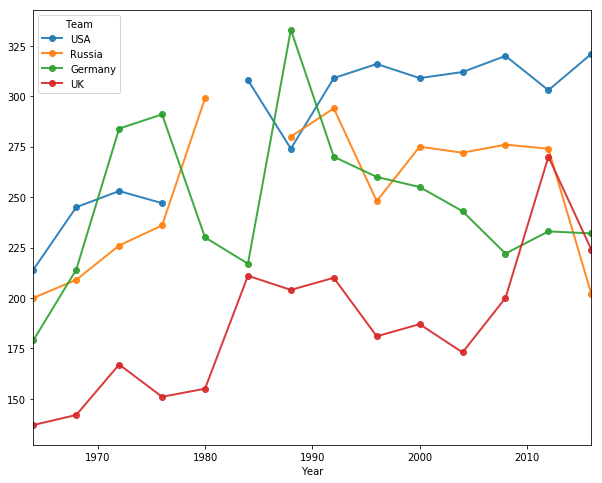

In [55]:
# plotting the medal tallies
year_team_medals.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (10,8), linewidth = 2)



*Interesting Insight 1*: The blank value at 1960 for USA is not a data error.  In 1980, the United States boycotted the Sumer Olympic Games in Moscow to protest the late 1979 Soviet invation of Afghanistan. 

*Interesting Insight 2:* The missing point in 1984 for Russia is also not a data error. The boycott of the 1984 Summer Olympics in Los Angeles followed four years after the U.S. led boycot of the 1980 Summer Olympics in Moscow.

*Interesting Insight 3:* US overall continues to performance well in the olympics and progressively becomes better

*Interesting Insight 4:* UK does significantly better in 2010 when the Summer Olympics were hosted in London.

In [56]:
#Plot of breakdown of medal tally by the medal type - Gold, Silver, Broanze

In [77]:
# List of top countries
top_countries = ['USA', 'Russia', 'Germany', 'UK']

In [78]:
# Row mask where countires match
row_mask_2 = medal_tally['Team'].map(lambda x: x in top_countries)

In [79]:
# Pivot table to calculate sum of gold, silver and bronze medals for each country
medal_tally_specific = pd.pivot_table(medal_tally[row_mask_2],
                                     index = ['Team'],
                                     columns = 'Medal',
                                     values = 'Medal_Won_Corrected',
                                     aggfunc = 'sum',
                                     fill_value = 0).drop('DNW', axis = 1)

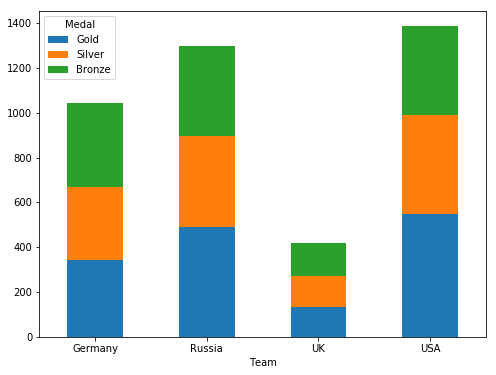

In [80]:
# Re-order the columns so that they appear in order on the chart
medal_tally_specific = medal_tally_specific.loc[:, ['Gold', 'Silver', 'Bronze']]

medal_tally_specific.plot(kind = 'bar', stacked = True, figsize = (8,6), rot = 0) 
# xlabel('Number of Medals') 
# ylabel('Country')


# Country's Best Sport

In [81]:
# To get the sports, teams are best at, we not aggregate the medal_tally dataframe as we did earlier
best_team_sports = pd.pivot_table(medal_tally[row_mask_2], index = ['Team', 'Event'], columns = 'Medal', values = 'Medal_Won_Corrected', aggfunc = 'sum', fill_value = 0).sort_values(['Team', 'Gold'], ascending = [True, False]).reset_index()

In [83]:
best_team_sports.drop(['Bronze', 'Silver', 'DNW'], axis = 1, inplace = True)

In [84]:
best_team_sports.columns = ['Team', 'Event', 'Gold_Medal_Count']

In [85]:
best_team_sports.groupby('Team').head()

,Team,Event,Gold_Medal_Count
0,Germany,"Equestrianism Mixed Dressage, Team",11
1,Germany,"Canoeing Women's Kayak Doubles, 500 metres",7
2,Germany,Rowing Men's Quadruple Sculls,7
3,Germany,Rowing Women's Quadruple Sculls,6
4,Germany,Athletics Men's Discus Throw,5
352,Russia,"Wrestling Men's Heavyweight, Freestyle",9
353,Russia,"Fencing Men's Sabre, Team",7
354,Russia,Gymnastics Women's Team All-Around,7
355,Russia,Rhythmic Gymnastics Women's Individual,7
356,Russia,"Wrestling Men's Light-Heavyweight, Freestyle",7


*Interesting Insight:* We see that UK is good at rowing, Germans excel in equestrian sports, Russians like to wrestle, and Americans like to swim. 

# Size of Olympic contingent that these countries send to the Olympics

1) The total contingent size being set to the Olympics

2) The team constitution in terms of the proportion of males and females

In [91]:
# take for each year, the team, name of the athelet and gender of the athlete and drop duplicates. Theres are values. 

# where the same athlete is taking part in more than one sport

# get rows with top countries
row_mark_3 = summer_olympics['Team'].map(lambda x: x in top_countries)

In [92]:
year_team_gender = summer_olympics.loc[row_mark_3, ['Year', 'Team', 'Name', 'Sex']].drop_duplicates()

In [93]:
# Create a pivot table to count gender wise representation of each team in each year
year_team_gender_count = pd.pivot_table(year_team_gender, index= ['Year', 'Team'], columns = 'Sex', aggfunc = 'count').reset_index()

In [94]:
# Rename columns as per column names in the 0th level
year_team_gender_count.columns = year_team_gender_count.columns.get_level_values(0)

In [106]:
# Rename the columns appropriately
year_team_gender_count.columns = ['Year', 'Team', 'Female_Athletes', 'Male_Athletes']
year_team_gender_count.head()

,Year,Team,Female_Athletes,Male_Athletes
0,1964,Germany,62,275
1,1964,Russia,63,254
2,1964,UK,44,160
3,1964,USA,79,267
4,1968,Germany,83,416


In [109]:
# Get total athletes per team-year
year_team_gender_count['Total_Athletes'] = year_team_gender_count['Female_Athletes'] + year_team_gender_count['Male_Athletes']

In [110]:
# Separate country wise data
uk_data = year_team_gender_count[year_team_gender_count['Team'] == "UK"]
uk_data.fillna(0, inplace = True)
uk_data.set_index('Year', inplace = True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4024: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [113]:
ger_data = year_team_gender_count[year_team_gender_count['Team'] == "Germany"]
ger_data.fillna(0, inplace = True)
ger_data.set_index('Year', inplace = True)

In [114]:
rus_data = year_team_gender_count[year_team_gender_count['Team'] == 'Russia']
rus_data.fillna(0, inplace = True)
rus_data.set_index('Year', inplace = True)

In [ ]:
usa_data = year_team_gender_count[year_team_gender_count['Team'] == 'USA']
usa_data.fillna(0, inplace = True)
u